# Computer Vision color spaces

### Import statements

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

### To edit an image making a copy of it is always a good idea!

In [2]:
# Load an image
# And make a copy of the original image to avoid manipulating the original image
pic_org = cv2.imread('pub.jpg')
pic = pic_org.copy()

[Hint](# "Numpy .copy function") 

## Color Spaces

### BGR Spliting the color channels

In [3]:
# Load a color image and split in is different B, G and R channels
B, G, R = cv2.split(pic)

[Hint](# "cv2.split") 

In [4]:
# Show each channel channel on screen
print(B)
print(G)
print(R)

[[42 43 47 ... 17 19 26]
 [36 37 38 ... 15 20 28]
 [29 29 29 ... 17 23 31]
 ...
 [34 35 40 ...  9  9  9]
 [32 35 39 ...  8  8  8]
 [33 35 40 ...  7  7  7]]
[[56 57 60 ... 38 40 45]
 [50 52 53 ... 36 39 45]
 [46 46 47 ... 37 40 46]
 ...
 [76 78 81 ...  9  9  9]
 [74 77 79 ...  8  8  8]
 [73 76 80 ...  7  7  7]]
[[ 79  79  82 ...  65  67  72]
 [ 78  78  79 ...  63  66  71]
 [ 79  79  78 ...  62  66  72]
 ...
 [121 121 120 ...   9   9   9]
 [119 120 121 ...   8   8   8]
 [121 121 122 ...   7   7   7]]


#### Merging the color channels

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


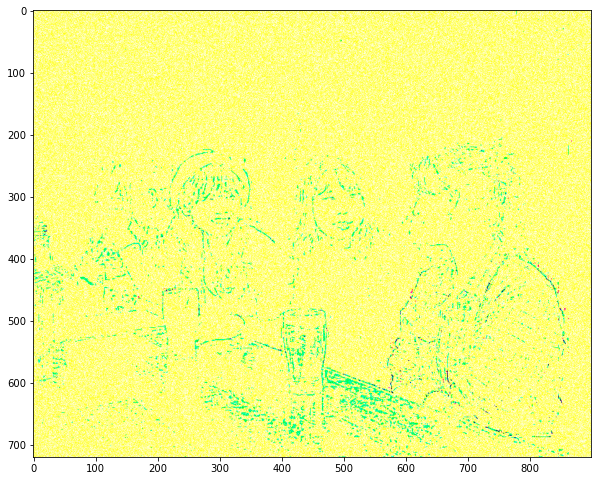

In [5]:
# Modify a channel and then merge them all again
#B.shape
R = np.random.rand(R.shape[0], R.shape[1])
#print(B)
pic = cv2.merge(np.array([B,G,R]), 3)
plt.figure(figsize=(10,10))
plt.imshow(pic)

[Hint](# "cv2.merge") 

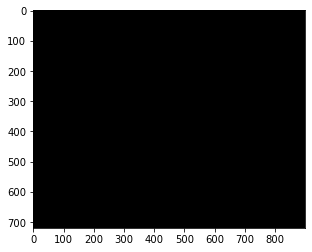

In [6]:
# Create a black canvas with the same size as the image you loaded
canvas = np.zeros(pic_org.shape)
plt.imshow(canvas)

[Hint](# "use numpy np.zeros function with the img.shape[:2]") 

# Merge each channel with the black canvas 
# So you will end up with 3 images: (Red,Black,Black), (Black,Green,Black) and (Black,Black,Blue) 
# Assuming you are working with RGB, but BGR is also fine
B, G, R = cv2.split(pic_org)
plt.figure(figsize=(10,10))
plt.imshow(canvas[:,:,0])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


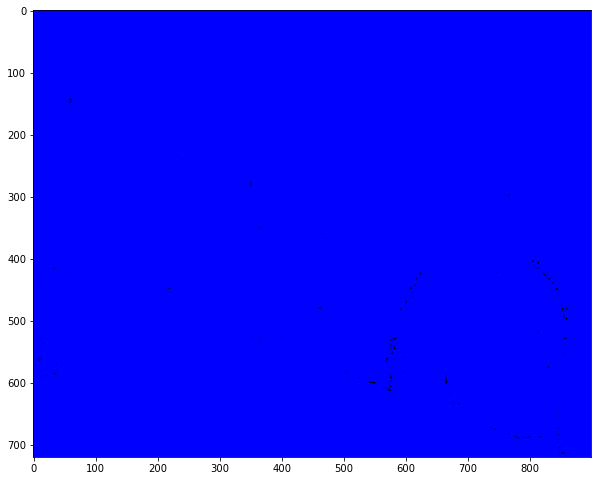

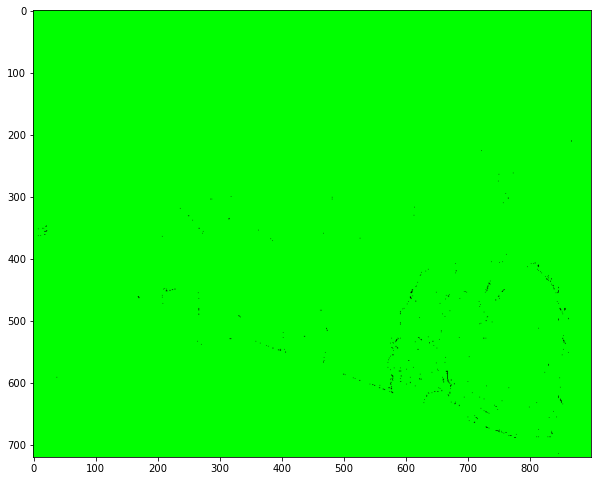

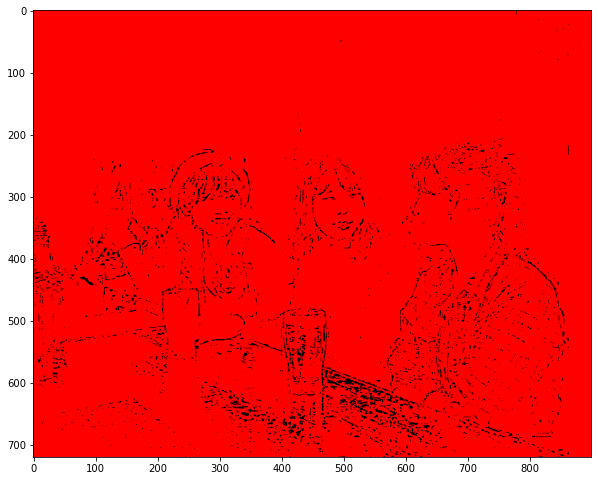

In [7]:
B, G, R = cv2.split(pic_org)
RBB = cv2.merge(np.array([canvas[:,:,0], canvas[:,:,1], R]), 3)
plt.figure(figsize=(10,10))
plt.imshow(RBB)
BGB = cv2.merge(np.array([canvas[:,:,0], G, canvas[:,:,2]]), 3)
plt.figure(figsize=(10,10))
plt.imshow(BGB)
BBB = cv2.merge(np.array([B, canvas[:,:,1], canvas[:,:,2]]), 3)
plt.figure(figsize=(10,10))
plt.imshow(BBB)

[Hint](# "cv2.merge") 

### HSV: Hue Saturation Value

#### M&Ms challenge!

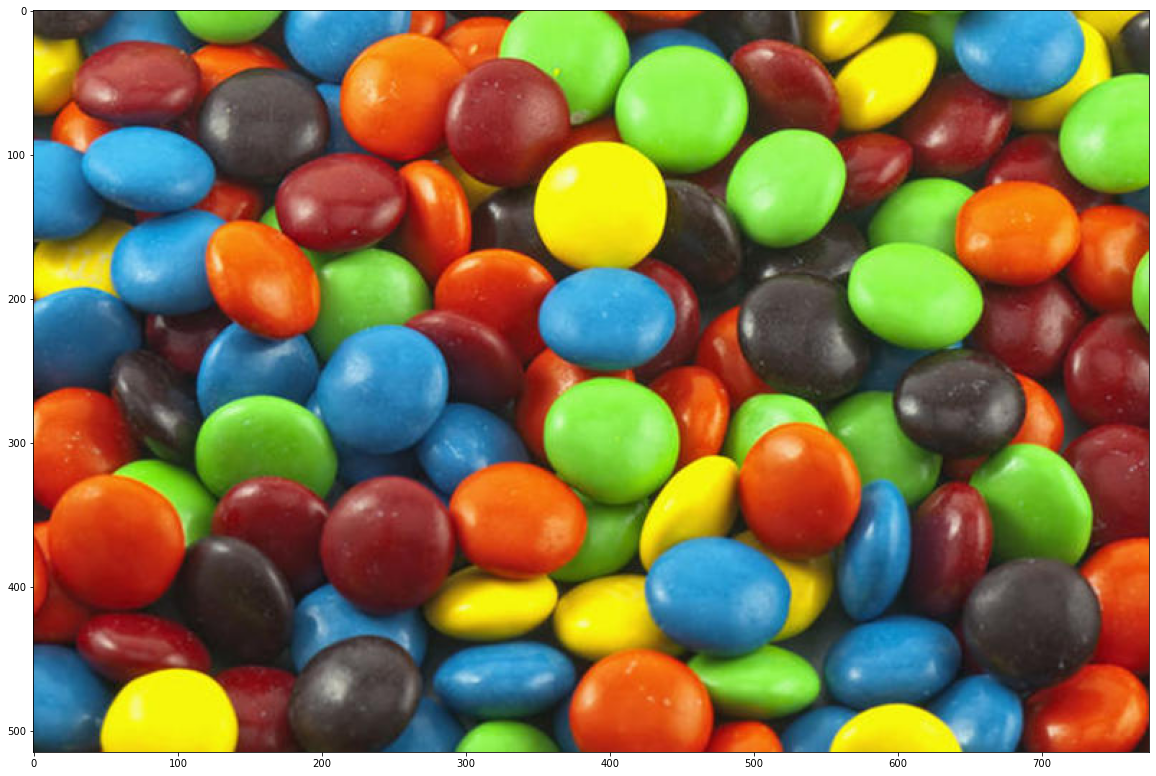

In [73]:
# Use the image below and convert it from BGR to HSV
img = cv2.imread('img/m.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.figure(figsize = (20,15));
plt.imshow(img);

In [110]:
# Split the H,S and V channels 
pic = img.copy()
pic = cv2.cvtColor(img,cv2.COLOR_RGB2HSV)
H, S, V = cv2.split(pic)

[Hint](# "cv2.cvtColor") 

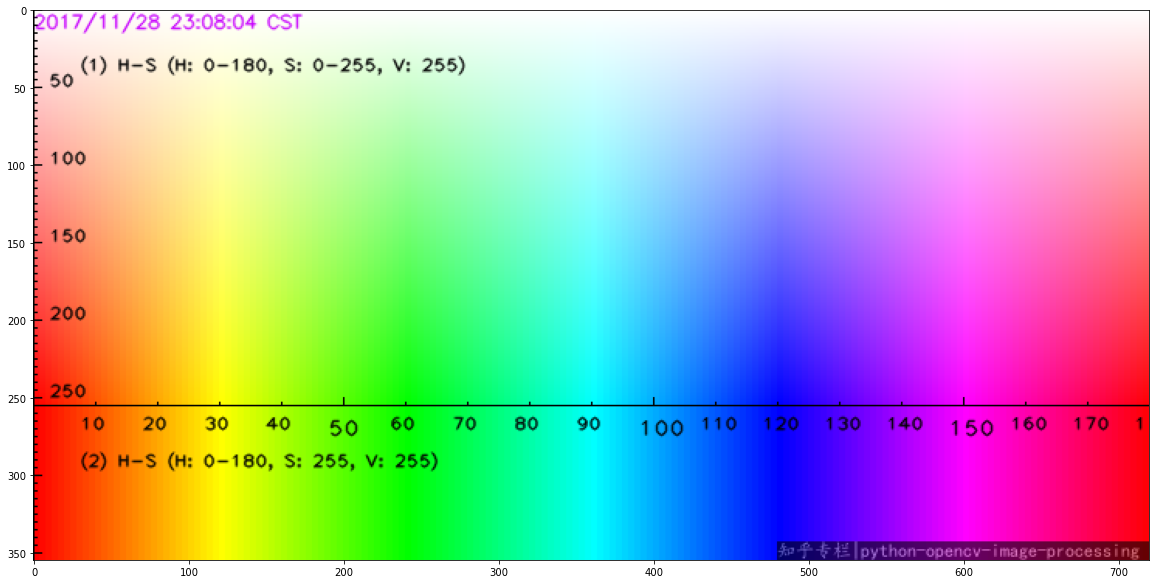

In [161]:
# Create a mask to filter out the Blue M&Ms (remember you need a lower and upper range)
# Make a copy of the hsv image and apply the mask to it, then display the image
hsv = cv2.imread("img/hsv.png")
hsv = cv2.cvtColor(hsv, cv2.COLOR_BGR2RGB)
plt.figure(figsize = (20,15))
plt.imshow(hsv)

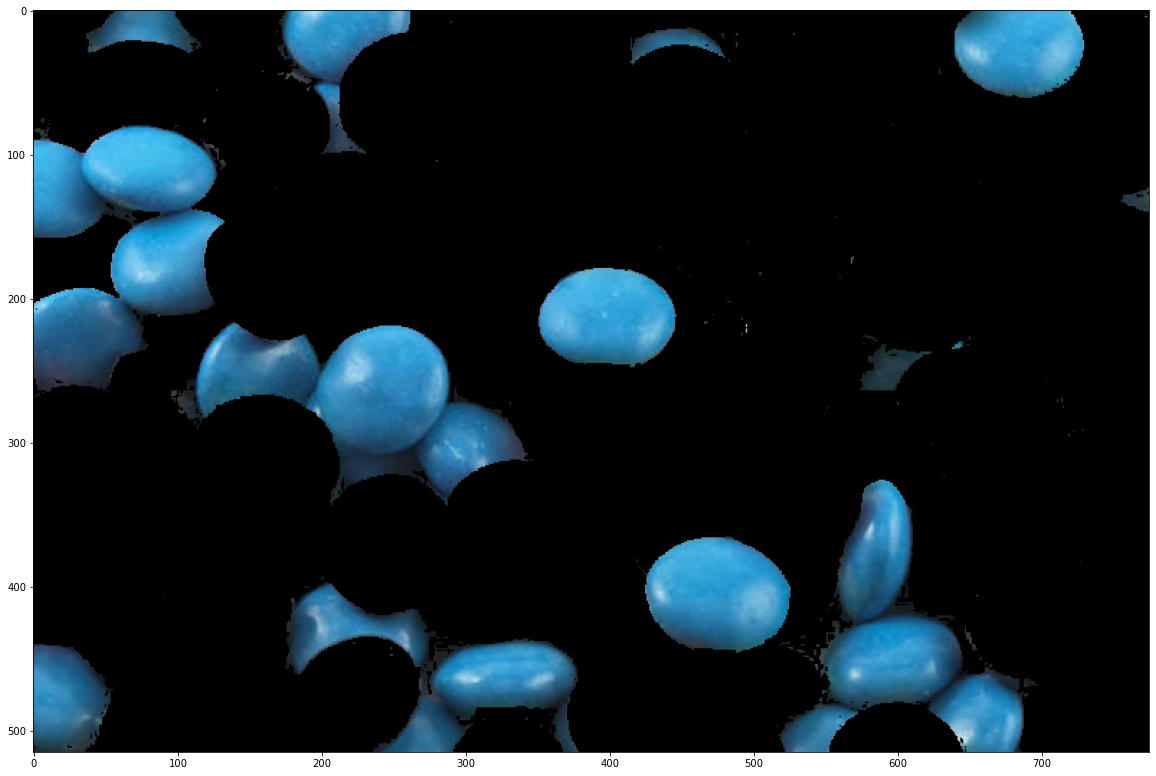

In [166]:
lower_range = np.array([90, 0, 0])
upper_range = np.array([125, 255, 255])
mask = cv2.inRange(pic, lower_range, upper_range)
pic_blue = img.copy()
pic_blue[mask == 0] = [0,0,0]
plt.figure(figsize = (20,15))
plt.imshow(pic_blue)

[Hint](# "cv2.inRange") 

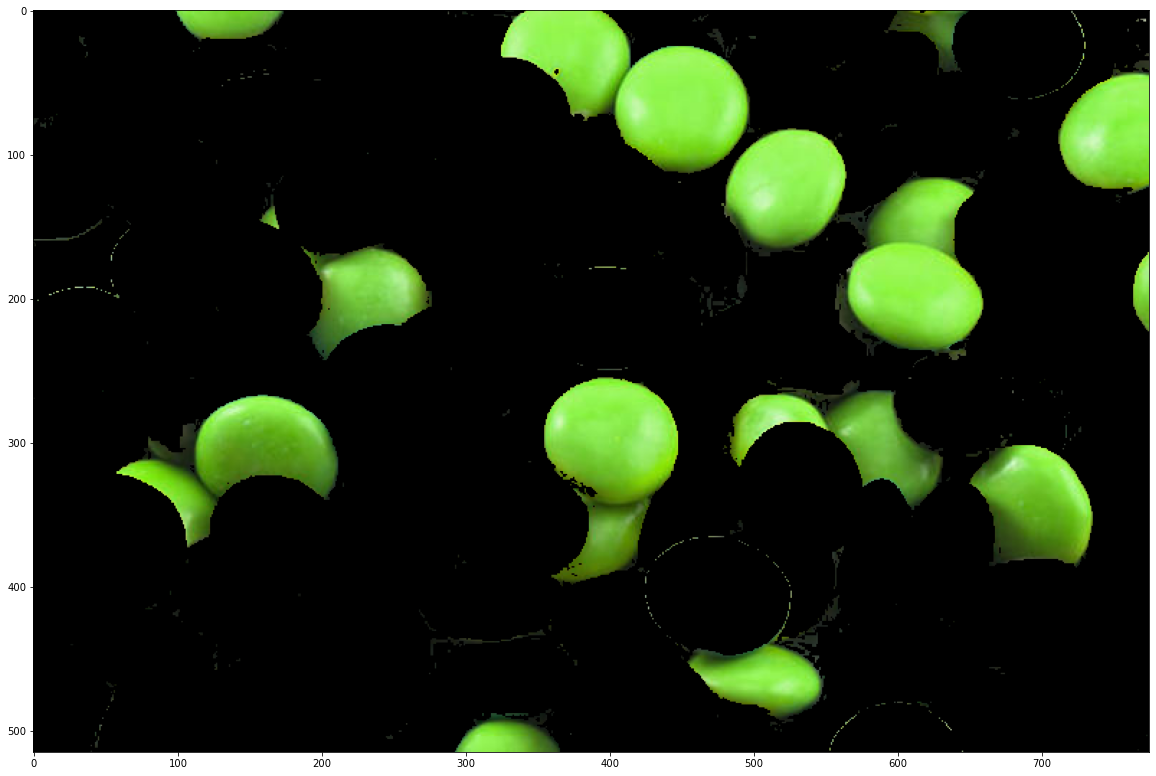

In [167]:
lower_range = (37, 35, 0)
upper_range = (70, 255, 255)
mask = cv2.inRange(pic, lower_range, upper_range)
pic_green = img.copy()
pic_green[mask == 0] = [0,0,0]
plt.figure(figsize = (20,15))
plt.imshow(pic_green)

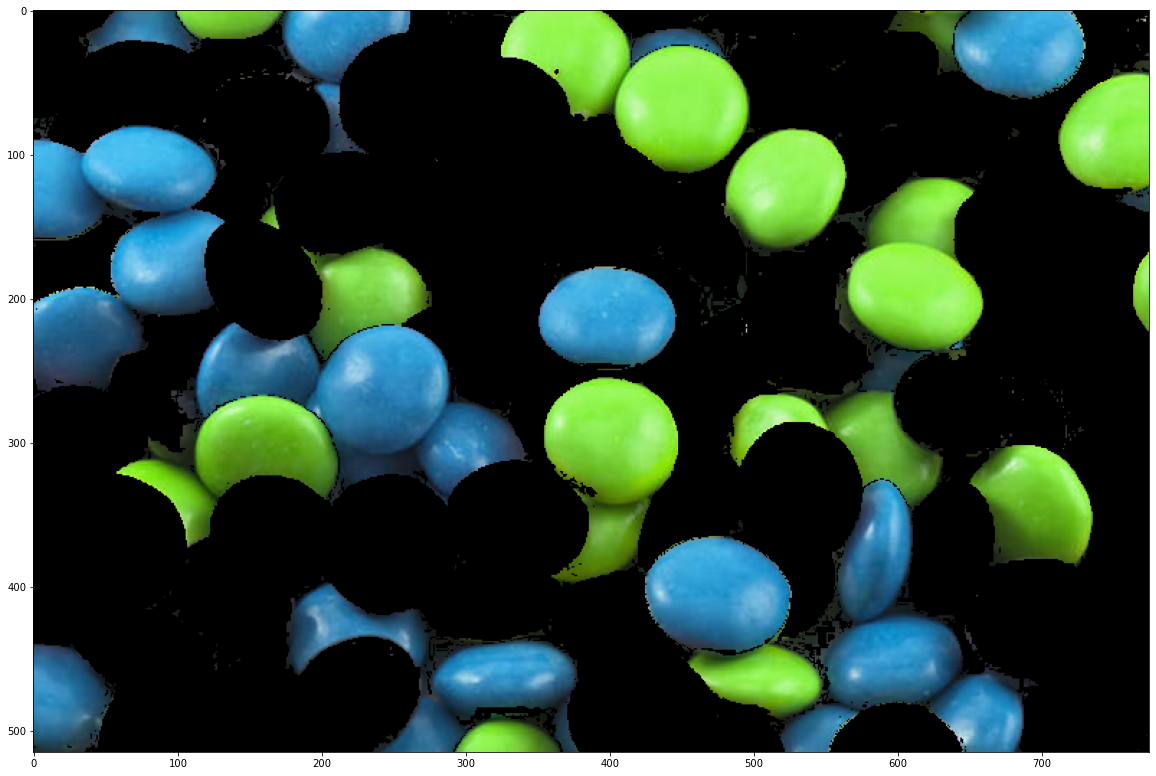

In [168]:
# Now combine both masks togheter so we can see all greens and blues in the same image!
combined = cv2.bitwise_or(pic_blue, pic_green)
plt.figure(figsize = (20,15))
plt.imshow(combined)

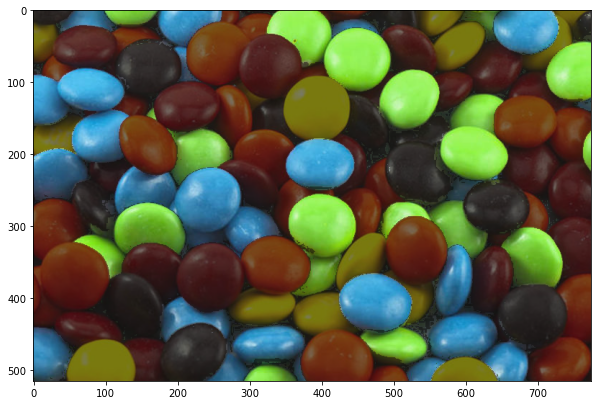

In [183]:
# Now lets combine both masks but also some opacity, we want to be able to see all M&Ms but
# Blues and greens will show as int he image above while the other colors will be faded out with some opacity
# You just need to add alpha to apply opacity to the dark parts of the mask, then display the image

ponk = cv2.addWeighted(combined, 0.5, img, 0.45, 10)
plt.figure(figsize=(10,10))
plt.imshow(ponk)

[Hint](# "cv2.addWeighted") 

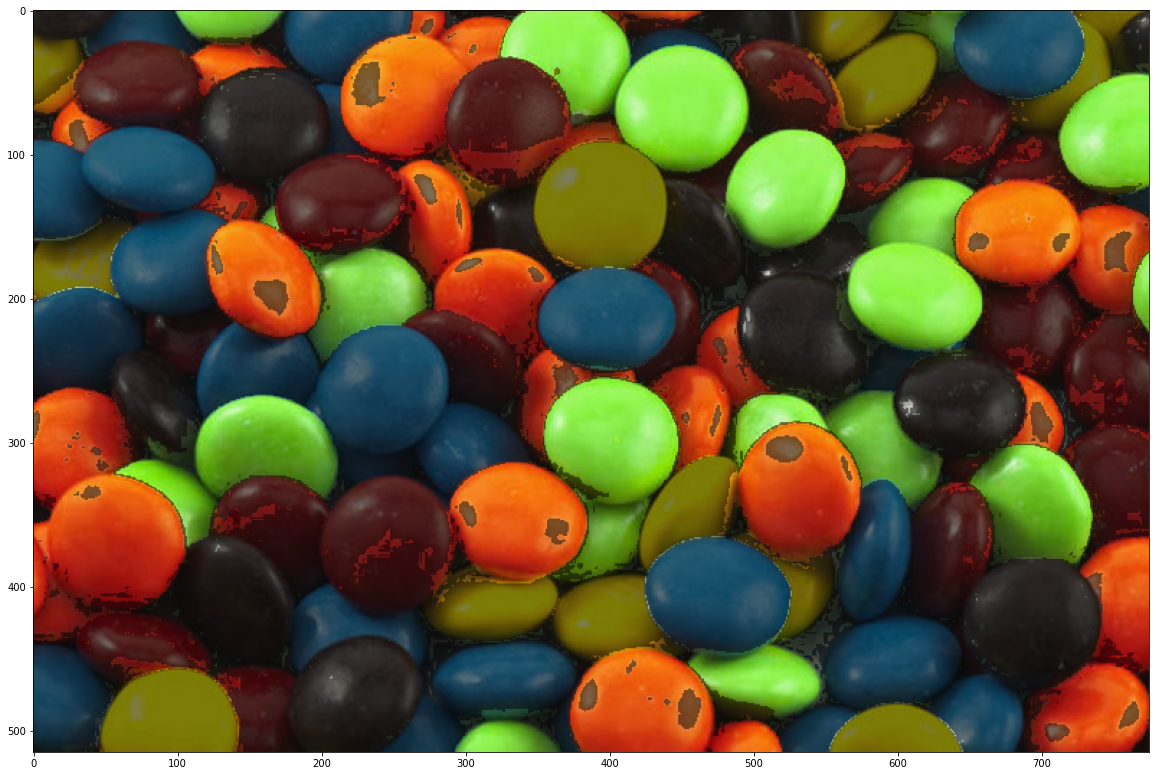

In [9]:
# Below you will find an example with oranges and greens just for reference so you can see what we want to accomplish
# In this example the oranges are not perfect, and it can be improved a lot easily.

## Mini project

### Level 1

#### Ball tracker

1. Given an image with a ball on it isolate the ball

### Level 2

#### Ball tracker

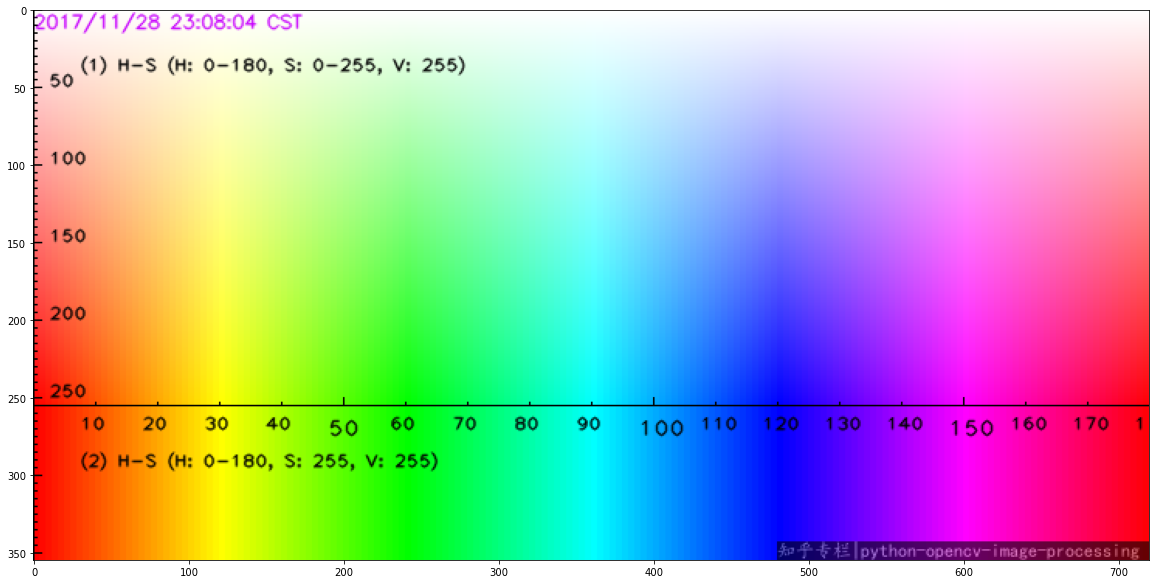

In [193]:
hsv = cv2.imread("img/hsv.png")
hsv = cv2.cvtColor(hsv, cv2.COLOR_BGR2RGB)
plt.figure(figsize = (20,15))
plt.imshow(hsv)

1. Make it track a ball in real time (either with a video or a webcam)

In [274]:
def track_green(frame):
    f_hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)
    lower_range = (20, 0, 0)
    upper_range = (80, 155, 100)
    mask = cv2.inRange(f_hsv, lower_range, upper_range)
    frame[mask == 0] = [0,0,0]
    return frame

255

In [275]:
video = cv2.VideoCapture('video.mp4')

while(video.isOpened()):
    check, frame = video.read()
    if frame is not None:
        #img = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        cv2.imshow('frame',track_green(frame)  )    
        if cv2.waitKey(30) & 0xFF == ord('q'):
            break
    else:
        break


video.release()
cv2.waitKey(0)
cv2.destroyAllWindows()
cv2.waitKey(1)

-1

### Level 3

#### Ball Tracker

1. Can you make it track two or more different color balls at the same time?